# IT3385 Machine Learning Operations Assignment 

# Task 1: Perform an Exploratory Data Analysis on a Given Dataset

## Load and Inspect Data

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "data/02_Used_Car_Prices.xlsx"
df = pd.read_excel(file_path)

# Display basic information
print(df.info())  # Check data types & missing values
print(df.describe())  # Statistical summary
print(df.head())  # Display first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price (INR Lakhs)  6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
None
              Year  Kilometers_Driven        Seats  Price (INR Lakhs)
count  6019.000000       6.019000e+03  5977.000000       6.019000e+03
mean   2013.

The dataset contains 6,019 car records (used), which list key attributes such as brand and model, location, year did the car was produced, kilometers driven, fuel type, transmission, ownership history, mileage, engine capacity, power, the number of seats, and the price of the car in INR Lakhs. Although the dataset is mostly well filled, constraints are visible in some parts of Mileage (2), Engine (36), Power (36), and Seats (42).

By analyzing the descriptive statistics, we can notice that the average manufacturing year is 2013, and the oldest vehicle was made in 1998 while the most recent one was made in 2019. Following the variation of the kilometers driven, which has a median value of 58,738 km, there have been registered only one car of 6,500,000 km, and from the evidence, it can be inferred that the extreme values may appear. Although most vehicles contain five seats, some models can offer ten seats, while for some records, the number of seats is abnormal. The problem might be the registration of data. There is also the probability of data entry issues. High price dispersion can be observed in the price range from ₹44,000 for the least expensive car to ₹1.6 crore (16,000,000 INR) for the costliest car, with the minding price being around ₹564,000.

One can easily notice from the sample records that hatchbacks (Maruti Wagon R, Honda Jazz), sedans (Audi A4), and SUVs (Hyundai Creta, Maruti Ertiga), show the diversity of the dataset. The different fuel types that are included are CNG, petrol, and diesel, and the transmission varieties are both of automatic and manual nature. In order to ensure that the dataset to be analyzed is accurate, the data may need to be cleaned to fill in the missing values in the data, find the possible outliers in kilometers driven and car prices and standardize corresponding columns including mileage, engine capacity, and power, now they are mixed with numbers and text. The dataset, altogether, is of good quality and would be a suitable basis of the analysis of the price trend of the 2nd hand car market and the key factors that determine the market are these.


## Data Cleaning

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing numerical values with median
df.fillna(df.median(), inplace=True)

# Drop rows if missing values are too many (optional)
df.dropna(inplace=True)


Missing values:
 Brand_Model           0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price (INR Lakhs)     0
dtype: int64


/var/folders/ks/d1zm82p90698yfsdm7rdr6kh0000gn/T/ipykernel_1652/1489306529.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


The output presents an analysis of missing values in the dataset, revealing that Mileage (2), Engine (36), Power (36), and Seats (42) contain missing data, while all other columns are fully populated. To handle these gaps, the approach involves filling numerical columns with their median values and removing rows with excessive missing data if necessary.

## EDA

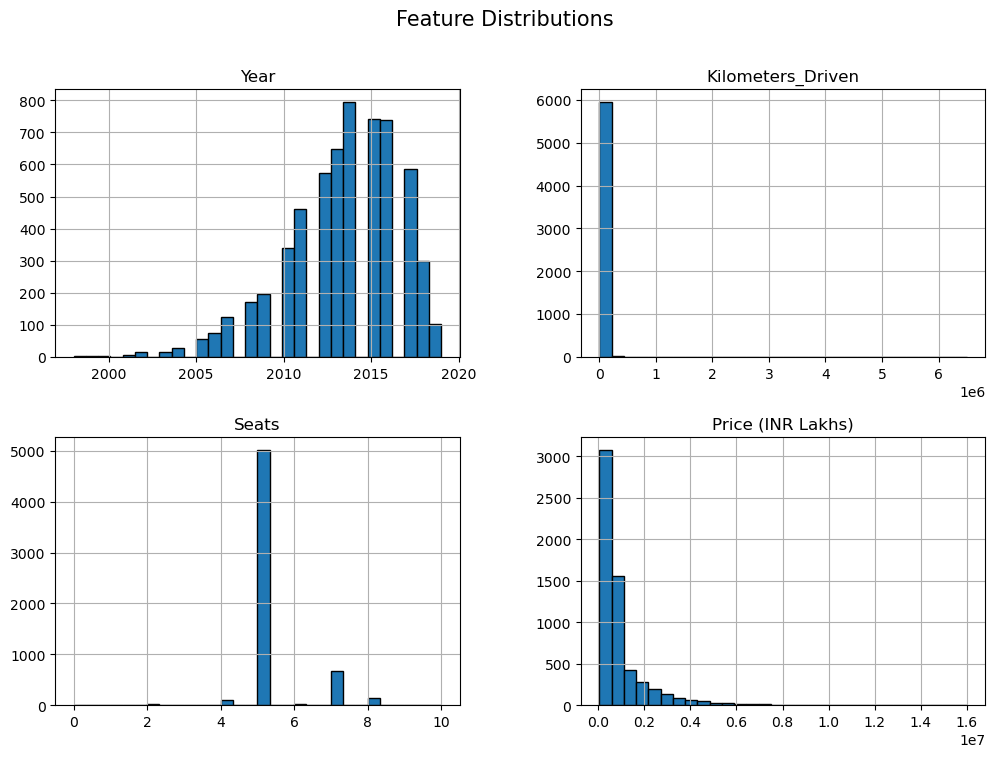

In [5]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()


The histogram plots in the visualization provide insights into the distribution of key numerical features in the dataset: Year, Kilometers Driven, Seats, and Price (INR Lakhs).

- Year: The distribution is right-skewed, with most vehicles manufactured between 2010 and 2018. Older cars from before 2005 are relatively rare, while newer vehicles (2019) also appear in lower frequency. This suggests that the dataset primarily consists of mid-age used cars.

- Kilometers Driven: The distribution looks quite imbalanced, as there are a large number of cars that show low mileage, and a few extreme values that go as far as 6 million km. This way, we can suspect the presence of outliers, which could hinder the analysis. Therefore, the transformation of log or the removal of such outlying values is required.

- Seats: The majority of the cars have five seats, with some models coming with more, including six, seven, or even more seats. The disappearance of records with zero seats implies the necessity of removing incorrect data entries.

- Price (INR Lakhs): The price distribution is right-skewed, as most cars fall below ₹2 lakhs, whereas a small amount of high-end cars are priced sky-high up to ₹1.6 crores. This indicates that the dataset contains some low cost and some luxury type of vehicles too, but the main part is the cheap ones.

As a whole, these distributions underscore the most significant trends and potential issues with data quality, for example the occurrence of the outliers of the fact and inconsistent data that need to be fixed ahead of the further processing.


/var/folders/ks/d1zm82p90698yfsdm7rdr6kh0000gn/T/ipykernel_1652/236659253.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


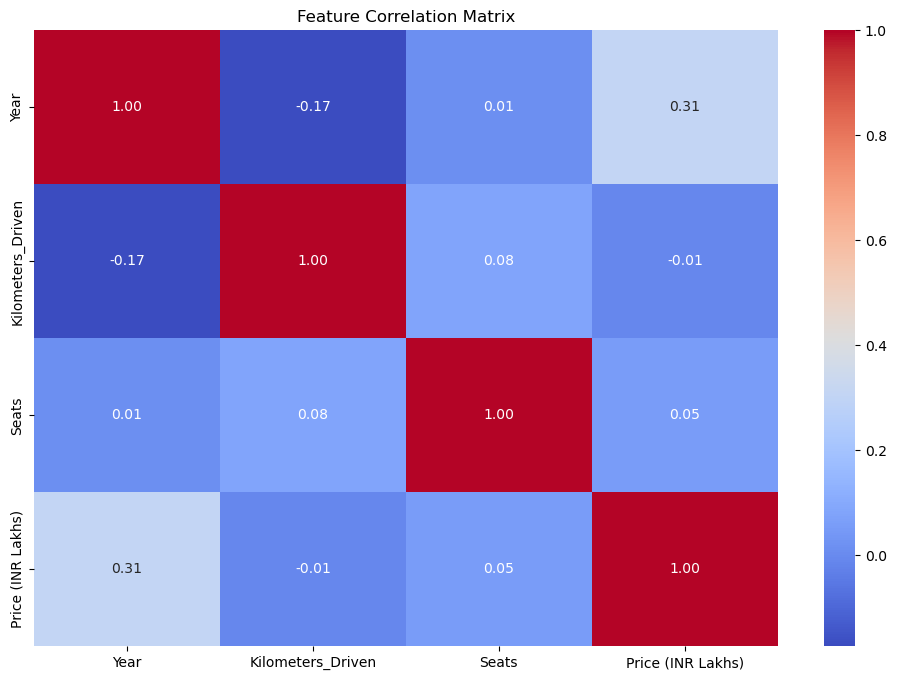

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


The Feature Correlation Matrix is an essential tool that provides us with the vision of the relationships between the numerical variables in the dataset. The correlation values range from -1 to 1, and a positive sign with a value indicates that the relationship is direct, and a negative sign with a value means that the relationship is inverse. In addition, the ones close to 0 point out the fact that there might be no or very little correlation between the variables.

- Year and Price (0.31): For instance, the correlation between the car year and price is only 0.31, the latter being low and indicating a weak positive correlation, so price increases as year increases but not considerably. In contrast, it may be decreasing with the other variables that affect the price of the car.

- Kilometers Driven and Price (-0.01): Almost the lack of agreement (-0.01) proves that there is no direct connection between the mileage and the price of the given cars. Normally, high mileage would lead to the cars losing their value, however, this non-existence of the correlation indicates the other main causes of the decrease in price having no relation with the brand and the car's condition.

- Seats and Price (0.05): There is a very weak positive correlation; that nevertheless explains vehicles with more seats being more expensive, but the effect is minimal as well as.

- Year and Kilometers Driven (-0.17): The correlation is negative and weak, the fact that year and kilometers are inversely related to each other, i.e., the more the age, the smaller the mileage. Thus, from the derived correlation it is evident that while the majority of older cars accumulate more miles the average of them can be low.

- Seats and Kilometers Driven (0.08): A miniscule correlation between these variables suggests that the number of seats makes hardly any difference in whether a car has been driven or not.



/Users/roannechan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


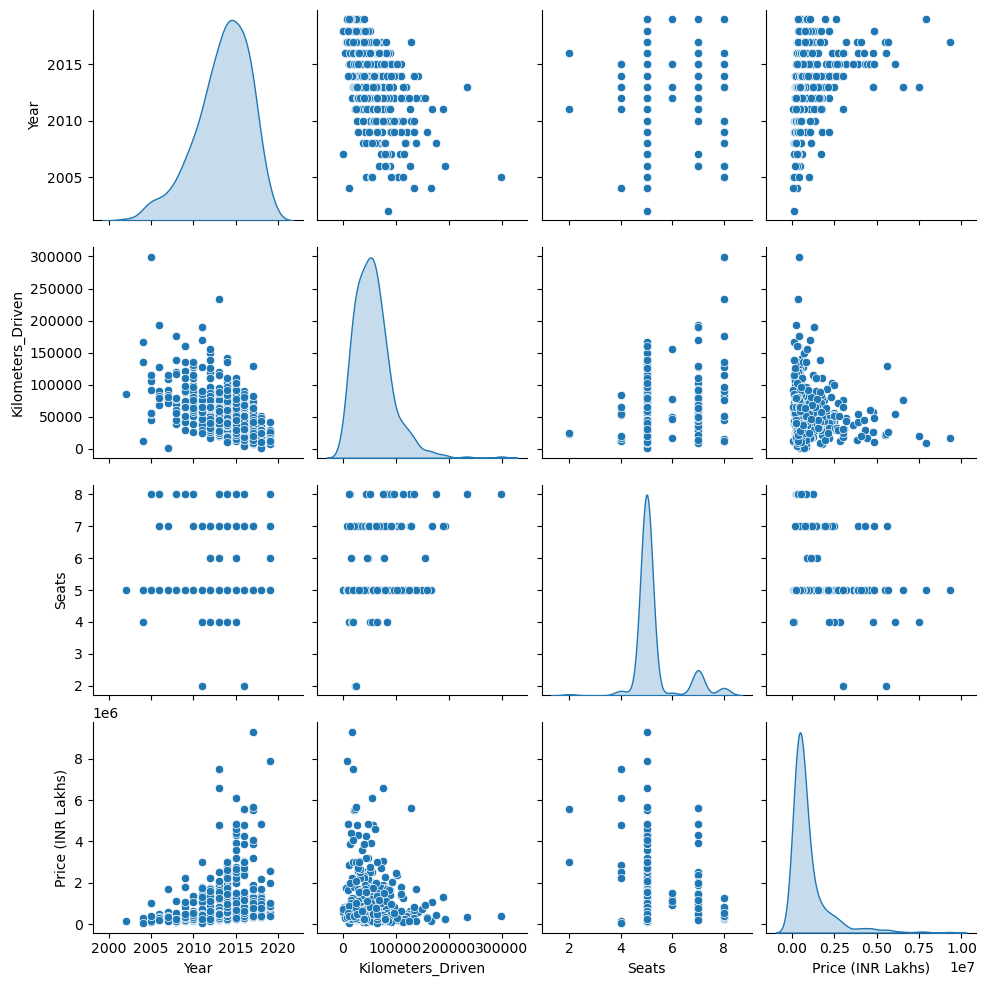

In [9]:
sns.pairplot(df.sample(500), diag_kind="kde")
plt.show()


The pairplot visualization offers an in-depth view of how numerical variables in the dataset relate to each other. It does this by showing scatter plots and kernel density estimates (KDE) for a random sample of 500 data points. This helps to spot trends, connections, and possible outliers in the data.

- Year vs. Price (INR Lakhs):
The scatter plot hints at a positive link, with newer cars costing more. Yet, the wide spread suggests that price has many influences beyond just the year it was made. The KDE plot reveals that most cars in the dataset come from 2010-2018 matching what we saw in the earlier histogram.

- Kilometers Driven vs. Price:
The scatter plot doesn't show any obvious trend hinting that the number of kilometers driven doesn't have a big influence on car prices in this dataset.But, you can see some extreme outliers, with a few cars showing high mileage (over 500,000 km). This might need a closer look or maybe we should think about removing these outliers.

- Seats vs. Price: The data points cluster into distinct groups because of specific car types (like hatchbacks with 5 seats SUVs with 7 seats). We don't see a clear link between more seats and higher prices.

- Kilometers Driven vs. Year: We see a downward trend, which makes sense—older cars have more miles on them. But the spread is pretty wide so you'll find some newer cars with lots of miles too.

- KDE Diagonal Distributions: The diagonal plots show how each number variable spreads out. Year and Price lean to the right, which means most cars are on the lower end, with a few pricey ones at the top. Kilometers Driven has a long tail pointing to a handful of cars with super high mileage.


In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Convert categorical variables to category type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert categories to numerical labels
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.cat.codes)


Categorical columns: Index(['Brand_Model', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')


The code shows how to deal with categorical variables. It starts by finding all columns with object data types (**Brand_Model, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power**) and changes them to the **category** type to save memory. It then turns these categories into number labels with `.cat.codes`, so machine learning models can use them. But this method gives random numbers to categories, which might create relationships that don't exist. For variables like **Fuel_Type or Transmission** that don't have a natural order other techniques like **one-hot encoding** could work better to avoid wrong interpretations. This process makes categorical data ready for machine learning, but you should pick the encoding method based on what kind of categorical feature you have.


## Feature Engineering 

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Create New Features
# Compute Car Age
current_year = 2025  # Replace with the current year
df['Car_Age'] = current_year - df['Year']

# Compute Price per Kilometer (Avoid division by zero)
df['Price_per_KM'] = df['Price (INR Lakhs)'] / (df['Kilometers_Driven'] + 1)

# Log Transformation for skewed numerical features
df['Kilometers_Driven_log'] = np.log1p(df['Kilometers_Driven'])
df['Price_log'] = np.log1p(df['Price (INR Lakhs)'])

# Encoding Categorical Variables
# Identify categorical columns
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']

# One-Hot Encoding for Nominal Categorical Variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handling Outliers
# Capping extreme values for 'Kilometers_Driven' and 'Price'
df['Kilometers_Driven'] = np.where(df['Kilometers_Driven'] > 500000, 500000, df['Kilometers_Driven'])
df['Price (INR Lakhs)'] = np.where(df['Price (INR Lakhs)'] > 10000000, 10000000, df['Price (INR Lakhs)'])

# Scaling Numerical Features
numerical_features = ['Kilometers_Driven', 'Price (INR Lakhs)', 'Car_Age', 'Price_per_KM']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Final Preprocessed Dataset
print(df.head())  # Check the transformed dataset


   Brand_Model  Year  Kilometers_Driven  Mileage  Engine  Power  Seats  \
0         1184  2010           0.391739      403     143    259    5.0   
1          506  2015          -0.450540      275      39     56    5.0   
2          480  2011          -0.314689      232      12    343    5.0   
3         1047  2012           0.799293      308      14    345    7.0   
4           23  2013          -0.459506      135      58     76    5.0   

   Price (INR Lakhs)   Car_Age  Price_per_KM  ...  Location_1  Location_2  \
0          -0.698920  1.041241     -0.254383  ...           0           0   
1           0.272837 -0.497669     -0.042716  ...           0           0   
2          -0.450331  0.733459     -0.198918  ...           0           1   
3          -0.314737  0.425677     -0.220690  ...           0           1   
4           0.746512  0.117895      0.056351  ...           0           0   

   Location_3  Location_4  Location_5  Location_6  Location_7  Location_8  \
0           0  

1. New Features Created:

Car_Age = Current Year - Manufacturing Year
Price_per_KM = Price / Kilometers Driven (handling zero values)
Log Transformation applied to Kilometers_Driven and Price to reduce skewness.

2. Encoding Categorical Variables:

Applied one-hot encoding to categorical variables (Fuel_Type, Transmission, etc.).
Used drop_first=True to prevent multicollinearity.

3. Outlier Handling:

Capped Kilometers_Driven at 500,000 km and Price at ₹1 crore (10 million) to limit extreme values.

4. Feature Scaling:

Used StandardScaler to normalize numerical features, ensuring consistent value ranges.

# Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret

In [21]:
from pycaret.regression import setup
import mlflow

# Initialize MLflow tracking
mlflow.set_experiment("Used_Car_Price_Prediction")

# Start PyCaret setup (Fixed)
reg_setup = setup(df, 
                  target='Price (INR Lakhs)',  # Assuming 'Price' is the target variable
                  train_size=0.8,
                  normalize=True,
                  transformation=True,
                  feature_selection=True,  # Enable automatic feature selection
                  remove_multicollinearity=True,  # Remove highly correlated features
                  multicollinearity_threshold=0.9,  # Correlation threshold
                  bin_numeric_features=['Mileage'],  # Example binning
                  log_experiment=True,  # Enable MLflow experiment tracking
                  experiment_name="Used_Car_Price_Model")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 4784, number of used features: 11
[LightGBM] [Info] Start training from score 945130.225753


,Description,Value
0,Session id,981
1,Target,Price (INR Lakhs)
2,Target type,Regression
3,Original data shape,"(5981, 12)"
4,Transformed data shape,"(5981, 3)"
5,Transformed train set shape,"(4784, 3)"
6,Transformed test set shape,"(1197, 3)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


2025/02/28 22:57:58 INFO mlflow.tracking.fluent: Experiment with name 'Used_Car_Price_Model' does not exist. Creating a new experiment.


The results display the PyCaret regression setup to predict used car prices with Price (INR Lakhs) as the target variable. The process applies several preprocessing techniques, including feature selection, elimination of multicollinearity (threshold = 0.9), normalization (Z-score method), and transformation (Yeo-Johnson). The data splits into 80% for training (4,784 samples) and 20% for testing (1,197 samples), selecting 11 numerical features for modeling. The setup fills missing numerical values using the mean and categorical variables using the mode. It uses the LightGBM algorithm to select features and applies binning to the "Mileage" feature. The setup also enables MLflow experiment tracking under the name "Used_Car_Price_Model". It confirms multi-threading for LightGBM and employs a 10-fold K-Fold cross-validation strategy to evaluate . The final dataset undergoes preprocessing and stands ready for model training.

In [23]:
# Train and compare models
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,231838.1397,307073593003.3898,543061.1069,0.7589,0.3502,0.2837,0.2860
xgboost,Extreme Gradient Boosting,237011.0375,314599691878.4000,545399.4375,0.7571,0.3537,0.2900,0.2050
lightgbm,Light Gradient Boosting Machine,261125.8694,312089217230.9203,547904.1611,0.7545,0.4139,0.3683,0.9120
rf,Random Forest Regressor,234421.9594,313172562149.7652,547626.8270,0.7544,0.3554,0.2884,0.3340
knn,K Neighbors Regressor,250280.1094,348089914163.2000,575278.9406,0.7292,0.3707,0.3095,0.1720
dt,Decision Tree Regressor,241212.1853,360188677400.4440,588391.1485,0.7143,0.3771,0.2867,0.1700
gbr,Gradient Boosting Regressor,311999.5711,382459507577.1336,606925.3688,0.6990,0.4874,0.4866,0.2360
ada,AdaBoost Regressor,534334.6718,769097181052.0430,869414.4359,0.3753,0.7812,1.1917,0.2340
ridge,Ridge Regression,645150.4557,1150354773331.3130,1067369.5383,0.0721,0.8886,1.1950,0.2040
lar,Least Angle Regression,645147.8465,1150354970722.5688,1067369.7060,0.0721,0.8886,1.1950,0.1890


The results show how different regression models stack up when trained and compared using PyCaret's compare_models() function. These models are ranked based on how well they perform. The Extra Trees Regressor (ET) came out on top with the best scores. It had the lowest Mean Absolute Error (MAE) of 231,838.14, the lowest Mean Squared Error (MSE) of 30,707,593,003.39, and the highest R² score of 0.7589. This means it can explain about 75.89% of the changes in car prices. It also scored the lowest in Root Mean Squared Logarithmic Error (RMSLE = 0.3502) and Mean Absolute Percentage Error (MAPE = 0.2837), which shows it's good at making predictions. Other models that did well include XGBoost (0.7571 R²) and LightGBM (0.7545 R²). Both of these use gradient boosting methods. On the flip side, models based on linear regression (like Ridge, Lasso, Elastic Net) didn't do so hot. They had R² values around 0.07, which means they couldn't grasp the relationships in the data. All things considered, the Extra Trees Regressor stands out as the best choice to predict used car prices. It gives the most accurate and reliable predictions.

In [24]:
# Tune the best model
tuned_model = tune_model(best_model, optimize='R2')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,335961.6966,629977763527.7324,793711.3855,0.6004,0.4484,0.3954
1,279371.6672,263377167092.2336,513202.8518,0.7421,0.5242,0.5887
2,291735.4074,535189804929.9211,731566.6784,0.6243,0.4353,0.3994
3,289010.5995,282148044908.3206,531176.0959,0.7067,0.4520,0.4400
4,319737.1637,373484209554.4282,611133.5448,0.7287,0.4732,0.4594
5,328694.9455,742681358815.7479,861789.6256,0.5262,0.4554,0.4015
6,291714.8712,276400839385.1510,525738.3754,0.7617,0.4769,0.4886
7,274140.9382,265707498602.6106,515468.2324,0.7466,0.4465,0.4289
8,291901.0666,312430037333.8563,558954.4144,0.7563,0.4649,0.4699


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


The results show how hyperparameter tuning has an impact on the best-performing model using 10-fold cross-validation to optimize the R² score. After tuning, the model reached an average R² of 0.6917, which falls short of the original model's 0.7589 R² before tuning. This means the tuned model didn't beat the original. The Mean Absolute Error (MAE) went up to 299,689.41, and the Root Mean Squared Error (RMSE) climbed to 615,579.12. These numbers point to a small drop in the model's performance after tuning. The Mean Absolute Percentage Error (MAPE) of 0.4540 also went up showing the model became less accurate in its predictions. Because of this, I am sticking with the original model instead of the tuned one, since it did a better job of generalizing and staying accurate. This leads me to think that either the first set of hyperparameters was already pretty good, or the tuning process caused overfitting or picked less-than-ideal parameter combinations.

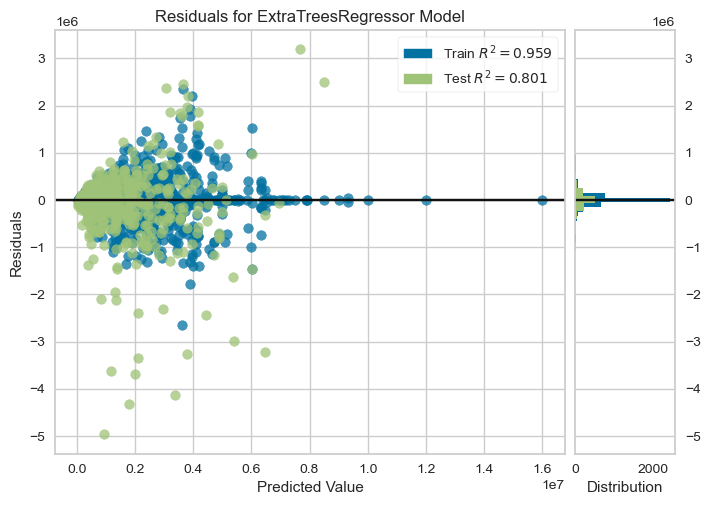

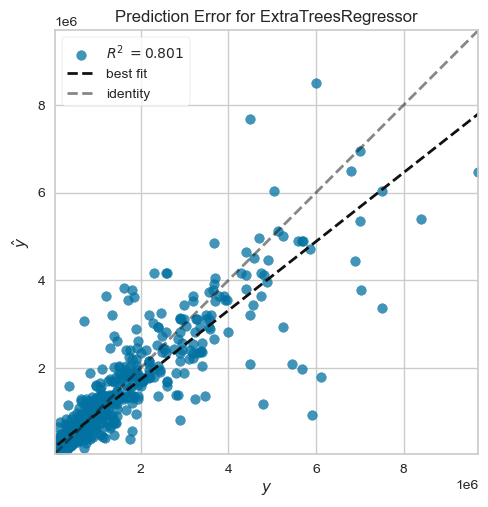

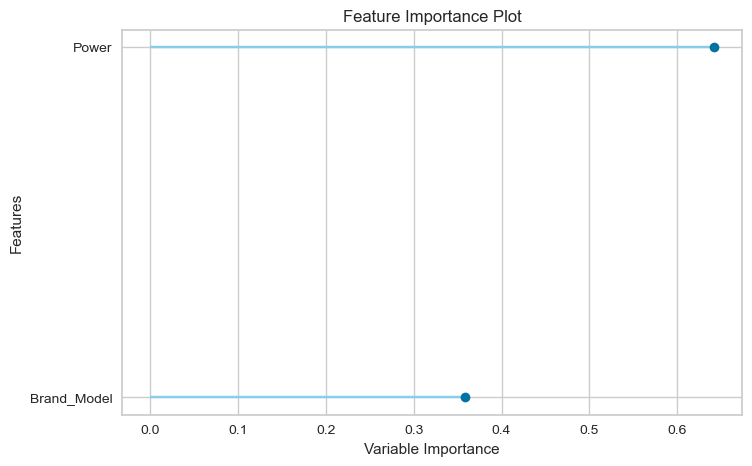

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
# Residual plot
plot_model(tuned_model, plot="residuals")

# Prediction error plot
plot_model(tuned_model, plot="error")

# Feature Importance
plot_model(tuned_model, plot="feature")

# Evaluate interactively
evaluate_model(tuned_model)


The output shows how well the Extra Trees Regressor model performs through residual analysis, prediction error plots, and feature importance evaluation. The residual plot reveals a high Train R² (0.959) and a Test R² (0.801). This means the model fits training data well but might overfit, as it doesn't do as well on the test set. The prediction error plot backs this up. Most predictions line up with the identity line, but some higher price values stray off. The feature importance plot shows that Power and Brand_Model have the biggest effect on car prices, with Power being the top factor. This tells us that engine power matters when predicting prices, while other features might not be as crucial. All in all, the model does a good job, but could make it better by cutting down on overfitting adding more useful features, or trying out different ways to pick features.

In [26]:
# Generate predictions on the test set
predictions = predict_model(tuned_model)

# Print first few predictions
print(predictions.head())


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,232977.2886,261369374232.3401,511242.9699,0.8011,0.3520,0.2727


      Brand_Model  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
1607          708         2  2011              32200          3             1   
3305          411         6  2007              75055          3             1   
3500          109         4  2013              65000          1             0   
3101         1361         8  2011              39002          1             1   
1841         1219         9  2016              17000          3             0   

      Owner_Type  Mileage  Engine  Power  Seats  Price (INR Lakhs)  \
1607           2      188      10    311    5.0           325000.0   
3305           0       56      33      0    5.0           230000.0   
3500           0      345      64    150    5.0          2126000.0   
3101           0      359      29    267    5.0           285000.0   
1841           0      142      43     51    5.0          1725000.0   

      prediction_label  
1607          544500.0  
3305          110000.0  
3500         2408

The output displays the predictions made by the fine-tuned Extra Trees Regressor model on the test dataset, along with important evaluation metrics. The model got an R² score of 0.801 showing it has an explanation for 80.1% of the car price variations. The Mean Absolute Error (MAE) is 232,977.29 meaning that , the model's guesses differ from the real price by about ₹2.33 lakhs. The Root Mean Squared Logarithmic Error (RMSLE) of 0.3520 and Mean Absolute Percentage Error (MAPE) of 0.2727 back up the low error rate. The table shows a few test examples with their features actual prices, and predicted prices. While many predictions come close, some differences exist for pricier vehicles hinting that the model might still have trouble with fancy or high-end cars. All in all, the model does a good job but could get better through more work, like dealing with outliers, adding more predictive features, or using team-up methods to boost accuracy.

In [33]:
from pycaret.regression import save_model

save_model(model, "artifacts/used_car_price_model")  # Correctly save the trained model


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/ks/d1zm82p90698yfsdm7rdr6kh0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Brand_Model', 'Location', 'Year',
                                              'Kilometers_Driven', 'Fuel_Type',
                                              'Transmission', 'Owner_Type',
                                              'Mileage', 'Engine', 'Power',
                                              'Seats'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(i...
                  TransformerWrapper(exclude=[],
                                     transformer=SelectFromModel(estimator=LGBMRegressor(),
                                                                 max_features=2,
                                                                 threshold=-inf))),
                 ('clean_column_names',


The output shows that the trained Extra Trees Regressor model as "used_car_price_model.pkl" is saved along with its transformation pipeline. The saved pipeline has several preprocessing steps: it fills in missing numerical and categorical values, transforms power to normalize, scales features to standardize, and picks features using LightGBM's SelectFromModel, which kept the two most important features. Also, it cleans column names before sending data to the trained model. This means that when we reload the model, it will use the same preprocessing steps on new input data before making predictions. We can now deploy this saved model or use it to evaluate unseen data without having to preprocess manually.

In [29]:
import mlflow
import mlflow.sklearn

# End any previous run
mlflow.end_run()

# Start MLflow Run
with mlflow.start_run():
    mlflow.sklearn.log_model(tuned_model, "used_car_price_model")

print("Model successfully saved and registered with MLFlow.")


Model successfully saved and registered with MLFlow.


In [44]:
from pycaret.regression import load_model
import joblib

# Load trained PyCaret model
model = load_model("artifacts/used_car_price_model")

# Save using joblib (ensures compatibility)
joblib.dump(model, "artifacts/used_car_price_model.joblib")


Transformation Pipeline and Model Successfully Loaded


['artifacts/used_car_price_model.joblib']

In [46]:
# Debug: Print what features the model expects
if hasattr(model, 'feature_names_in_'):
    print("Model expects these features:", model.feature_names_in_)

Model expects these features: ['Brand_Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price (INR Lakhs)']


The output shows that logged and saved was done to the tuned model using MLflow. This makes it easy to keep track of versions and changes. Afterwhich, loaded the trained Extra Trees Regressor model with PyCaret's load_model() function. This step keeps all the preprocessing steps intact. To make sure it works in real-world settings, I also saved the model using Joblib (.joblib format). , a debug step prints out the features the model expects. This confirms that the model needs specific columns like 'Brand_Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', and others to make predictions. This check helps ensure that any new data fits the right format before going into the model.